Preparing pokedex based on gen I-IX including all varianties like mega evolution and regional forms

Dataset is based on website https://pokemondb.net/pokedex/all that is very well known in pokemon community

Project goal is to find correlations beetween pokemons and their forms and higlight the best forms.


TO DO 
  - Type vs Type on scatterplot to check difference (function) - done
  - Check the strongest pokemons by type/mega/legend (function) - done
  - Chart of pokemons by type (there is already function to make table search_by_type()) - done
  - Stat analysis on chart sns.boxplot() or sns.violinplot - done
  - find corelation between type and stats - done
  - finding types of pokemons per generation - done
  - describe each step/function 
  - upload to GitHub


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
# from sklearn import svm
# from sklearn import linear_model
# from sklearn import neighbors

In [3]:
df = pd.read_csv("Pokemon gen I-IX.csv")

In [4]:
# df[(df.Type1 == "Ghost") | (df.Type2 == "Ghost")]

In [5]:
# Selecting each mega evolution
df["Mega?"] = df.Form.apply(lambda x: "Mega" in x)
df


,ID,Name,Form,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Mega?
0,1,Bulbasaur,,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,,Fire,,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,,Fire,,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,1006,Iron Valiant,,Fairy,Fighting,590,74,130,90,120,60,116,9,False
1190,1007,Koraidon,,Fighting,Dragon,670,100,135,115,85,100,135,9,False
1191,1008,Miraidon,,Electric,Dragon,670,100,85,100,135,115,135,9,False
1192,1009,Walking Wake,,Water,Dragon,590,99,83,91,125,83,109,9,False


In [6]:
ID_legend = list(range(144, 152)) + list(range(243, 246)) + list(range(249, 252)) + list(range(377, 387))  + list(range(480, 495)) + list(range(638, 650)) + list(range(785, 793)) + list(range(716, 722)) + list(range(785, 793)) + list(range(801, 803)) + list(range(807, 810)) + list(range(888, 900)) + list(range(1001, 1005)) + list(range(1007, 1009)) + list(range(1014, 1018)) + list(range(1024, 1026))
data_if_legend = [[ID, "True"] for ID in ID_legend]

In [7]:
print(data_if_legend)

[[144, 'True'], [145, 'True'], [146, 'True'], [147, 'True'], [148, 'True'], [149, 'True'], [150, 'True'], [151, 'True'], [243, 'True'], [244, 'True'], [245, 'True'], [249, 'True'], [250, 'True'], [251, 'True'], [377, 'True'], [378, 'True'], [379, 'True'], [380, 'True'], [381, 'True'], [382, 'True'], [383, 'True'], [384, 'True'], [385, 'True'], [386, 'True'], [480, 'True'], [481, 'True'], [482, 'True'], [483, 'True'], [484, 'True'], [485, 'True'], [486, 'True'], [487, 'True'], [488, 'True'], [489, 'True'], [490, 'True'], [491, 'True'], [492, 'True'], [493, 'True'], [494, 'True'], [638, 'True'], [639, 'True'], [640, 'True'], [641, 'True'], [642, 'True'], [643, 'True'], [644, 'True'], [645, 'True'], [646, 'True'], [647, 'True'], [648, 'True'], [649, 'True'], [785, 'True'], [786, 'True'], [787, 'True'], [788, 'True'], [789, 'True'], [790, 'True'], [791, 'True'], [792, 'True'], [716, 'True'], [717, 'True'], [718, 'True'], [719, 'True'], [720, 'True'], [721, 'True'], [785, 'True'], [786, 'Tr

In [8]:
data_if_legend = pd.DataFrame(data_if_legend, columns=["ID", "Legendary"])
df_legendary_up_to_IX = pd.merge(df, data_if_legend[['ID', 'Legendary']], on='ID', how='left')

In [9]:
df_legendary_up_to_IX["Legendary"] = df_legendary_up_to_IX["Legendary"].apply(lambda x: 'False' if x != 'True' else x)
df_legendary_up_to_IX

,ID,Name,Form,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Mega?,Legendary
0,1,Bulbasaur,,Grass,Poison,318,45,49,49,65,65,45,1,False,False
1,2,Ivysaur,,Grass,Poison,405,60,62,63,80,80,60,1,False,False
2,3,Venusaur,,Grass,Poison,525,80,82,83,100,100,80,1,False,False
3,4,Charmander,,Fire,,309,39,52,43,60,50,65,1,False,False
4,5,Charmeleon,,Fire,,405,58,64,58,80,65,80,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,1006,Iron Valiant,,Fairy,Fighting,590,74,130,90,120,60,116,9,False,False
1198,1007,Koraidon,,Fighting,Dragon,670,100,135,115,85,100,135,9,False,True
1199,1008,Miraidon,,Electric,Dragon,670,100,85,100,135,115,135,9,False,True
1200,1009,Walking Wake,,Water,Dragon,590,99,83,91,125,83,109,9,False,False


In [10]:
df_legendary_up_to_IX["Mega"] = df_legendary_up_to_IX["Mega?"].apply(lambda x: 'False' if x == False else 'True')
df_legendary_up_to_IX = df_legendary_up_to_IX.drop(['Mega?'], axis=1)

In [11]:
df_legendary_up_to_IX[df_legendary_up_to_IX['Legendary'] == 'True']

,ID,Name,Form,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega
143,144,Articuno,,Ice,Flying,580,90,85,100,95,125,85,1,True,False
144,145,Zapdos,,Electric,Flying,580,90,90,85,125,90,100,1,True,False
145,146,Moltres,,Fire,Flying,580,90,100,90,125,85,90,1,True,False
146,147,Dratini,,Dragon,,300,41,64,45,50,50,50,1,True,False
147,148,Dragonair,,Dragon,,420,61,84,65,70,70,70,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1002,Chien-Pao,,Dark,Ice,570,80,120,80,90,65,135,9,True,False
1194,1003,Ting-Lu,,Dark,Ground,570,155,110,125,55,80,45,9,True,False
1195,1004,Chi-Yu,,Dark,Fire,570,55,80,80,135,120,100,9,True,False
1198,1007,Koraidon,,Fighting,Dragon,670,100,135,115,85,100,135,9,True,False


In [12]:
number_of_legends = len(df_legendary_up_to_IX[df_legendary_up_to_IX['Legendary'] == "True"])
number_of_legends

130

In [13]:
pokedex_IX = df_legendary_up_to_IX.copy()

In [14]:
num_of_types = pokedex_IX.Type1.nunique()
num_of_types

18

In [15]:
pokedex_IX.describe(include='all')

,ID,Name,Form,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega
count,1202.000000,1202,1202,1202,1202,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202,1202
unique,NaN,1011,199,18,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,Rotom,,Water,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
freq,NaN,6,980,151,544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1072,1154
mean,494.714642,NaN,NaN,NaN,NaN,441.797837,70.948419,81.003328,74.712978,72.985025,72.291181,69.856905,5.003328,NaN,NaN
std,293.726596,NaN,NaN,NaN,NaN,121.436695,26.929686,32.186022,30.708020,32.764669,27.722307,30.207324,2.560831,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,NaN,NaN
25%,237.250000,NaN,NaN,NaN,NaN,330.000000,52.000000,56.000000,52.000000,50.000000,50.000000,45.000000,3.000000,NaN,NaN
50%,489.500000,NaN,NaN,NaN,NaN,463.000000,70.000000,80.000000,70.000000,65.000000,70.000000,68.000000,5.000000,NaN,NaN
75%,745.000000,NaN,NaN,NaN,NaN,520.000000,85.000000,100.000000,90.000000,95.000000,90.000000,91.000000,7.000000,NaN,NaN


In [16]:
generations_count = pokedex_IX.Generation.value_counts().sort_index()
print(generations_count)
print(f"The highest number of pokemons is in generation {generations_count.idxmax()}: {generations_count.max()} pokemons and a lowest is in generation {generations_count.idxmin()}: pokemons {generations_count.min()}")

1    151
2    100
3    141
4    118
5    165
6    131
7    130
8    147
9    119
Name: Generation, dtype: int64
The highest number of pokemons is in generation 5: 165 pokemons and a lowest is in generation 2: pokemons 100


In [17]:
# function to show a df with selected pokemon types
def search_by_type(pokedex_IX, type1, type2 = ' '):
    return pokedex_IX[(pokedex_IX['Type1'] == type1) & (pokedex_IX['Type2'] == type2)]

In [18]:
search_by_type(pokedex_IX, 'Fire')

,ID,Name,Form,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega
3,4,Charmander,,Fire,,309,39,52,43,60,50,65,1,False,False
4,5,Charmeleon,,Fire,,405,58,64,58,80,65,80,1,False,False
36,37,Vulpix,,Fire,,299,38,41,40,50,65,65,1,False,False
37,38,Ninetales,,Fire,,505,73,76,75,81,100,100,1,False,False
57,58,Growlithe,,Fire,,350,55,70,45,70,50,60,1,False,False
58,59,Arcanine,,Fire,,555,90,110,80,100,80,95,1,False,False
76,77,Ponyta,,Fire,,410,50,85,55,65,65,90,1,False,False
77,78,Rapidash,,Fire,,500,65,100,70,80,80,105,1,False,False
125,126,Magmar,,Fire,,495,65,95,57,100,85,93,1,False,False
135,136,Flareon,,Fire,,525,65,130,60,95,110,65,1,False,False


In [19]:
# function to check best stat
def search_pokemon_by_best_stat(pokedex_IX, stat):
    return pokedex_IX.loc[pokedex_IX[stat].idxmax()]

In [20]:
search_pokemon_by_best_stat(pokedex_IX, stat='Attack')

ID                      150
Name                 Mewtwo
Form          Mega Mewtwo X
Type1               Psychic
Type2              Fighting
Total                   780
HP                      106
Attack                  190
Defense                 100
Sp. Atk                 154
Sp. Def                 100
Speed                   130
Generation                6
Legendary              True
Mega                   True
Name: 688, dtype: object

**Visualization of data**

In [21]:
# sns.histplot(pokedex_IX.Defense)
# plt.axvline(pokedex_IX.Defense.mean(),linestyle='dashed',color='red')
# plt.show()

In [22]:
def histogram_for_stat(pokedex_IX, stat):
    sns.histplot(pokedex_IX[stat])
    plt.axvline(pokedex_IX[stat].mean(),linestyle='dashed',color='red')
    plt.title(f'Histogram of Pokemon by {stat}')
    plt.show()
    

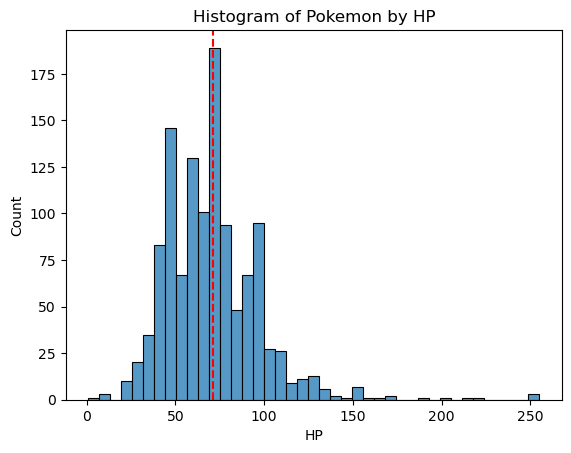

In [23]:
histogram_for_stat(pokedex_IX, stat='HP')

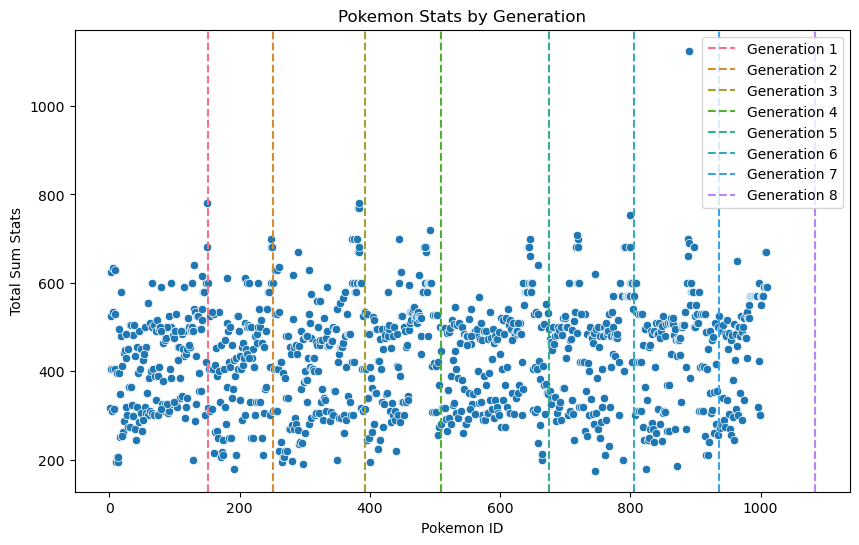

In [24]:
cumulative_counts = generations_count.cumsum()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pokedex_IX['ID'], y=pokedex_IX['Total'])
colors = sns.color_palette("husl", len(cumulative_counts - 1))
for i, count in enumerate(cumulative_counts[:8]):
    plt.axvline(x=count, color=colors[i], linestyle='--', label=f'Generation {generations_count.index[cumulative_counts[cumulative_counts == count].index[0]] - 1}')

plt.title('Pokemon Stats by Generation')
plt.xlabel('Pokemon ID')
plt.ylabel('Total Sum Stats')
plt.legend(loc = 1)
plt.show()


In [25]:
def type_vs_type_stats(pokedex_IX, pokemon1_type, pokemon2_type, stat1, stat2):
    plt.scatter(x = pokedex_IX[pokedex_IX['Type1'] == pokemon1_type][stat1], y = pokedex_IX[pokedex_IX['Type1'] == pokemon1_type][stat2], label = pokemon1_type, marker = 'o')
    plt.scatter(x = pokedex_IX[pokedex_IX['Type1'] == pokemon2_type][stat1], y = pokedex_IX[pokedex_IX['Type1'] == pokemon2_type][stat2], label = pokemon2_type, marker = 's')
    plt.xlabel(f"{stat1}")
    plt.ylabel(f"{stat2}")
    plt.legend()
    plt.show()


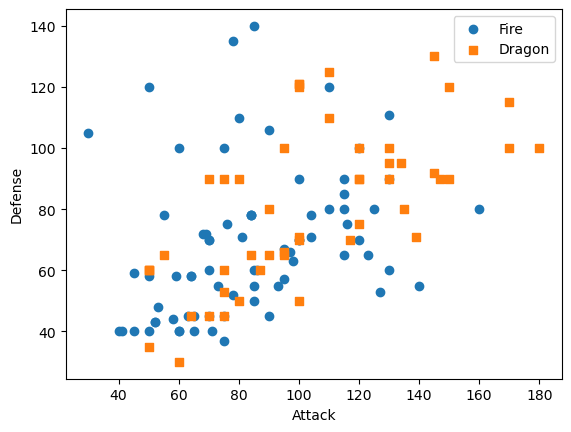

In [26]:
type_vs_type_stats(pokedex_IX, pokemon1_type='Fire', pokemon2_type='Dragon', stat1='Attack', stat2 = 'Defense')

In [27]:
def stongest_pokemon(pokedex_IX, type='Type1', stat = 'Total', mega = 'False', legendary = 'False'):
    return (pokedex_IX[pokedex_IX['Mega'] == mega]
            [pokedex_IX['Legendary'] == legendary]
            .sort_values(by = stat, ascending=False)
            .drop_duplicates(subset=[type], keep='first'))
            


In [28]:
stongest_pokemon(pokedex_IX, mega='True')

C:\Users\karol\AppData\Local\Temp\ipykernel_18188\3820927702.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return (pokedex_IX[pokedex_IX['Mega'] == mega]


,ID,Name,Form,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega
695,248,Tyranitar,Mega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,6,False,True
719,445,Garchomp,Mega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,6,False,True
712,376,Metagross,Mega Metagross,Steel,Psychic,700,80,145,150,105,110,110,6,False,True
686,130,Gyarados,Mega Gyarados,Water,Dark,640,95,155,109,70,130,81,6,False,True
677,6,Charizard,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,6,False,True
696,254,Sceptile,Mega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,6,False,True
720,448,Lucario,Mega Lucario,Fighting,Steel,625,70,145,88,140,70,112,6,False,True
699,282,Gardevoir,Mega Gardevoir,Psychic,Fairy,618,68,85,65,165,135,100,6,False,True
690,181,Ampharos,Mega Ampharos,Electric,Dragon,610,90,95,105,165,110,45,6,False,True
683,94,Gengar,Mega Gengar,Ghost,Poison,600,60,65,80,170,95,130,6,False,True


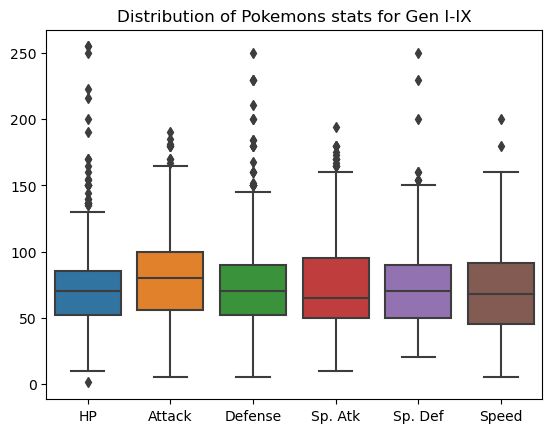

In [29]:
stats_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
sns.boxplot(data=pokedex_IX[stats_columns])
plt.title("Distribution of Pokemons stats for Gen I-IX")
plt.show()

In [30]:
type_counts = pd.concat([pokedex_IX['Type1'], pokedex_IX['Type2']], ignore_index=True)
type_counts = type_counts.dropna().value_counts()
type_combines = type_counts.reset_index()
type_combines = type_combines.drop([0,0])
type_combines.columns = ['Type', 'Count']


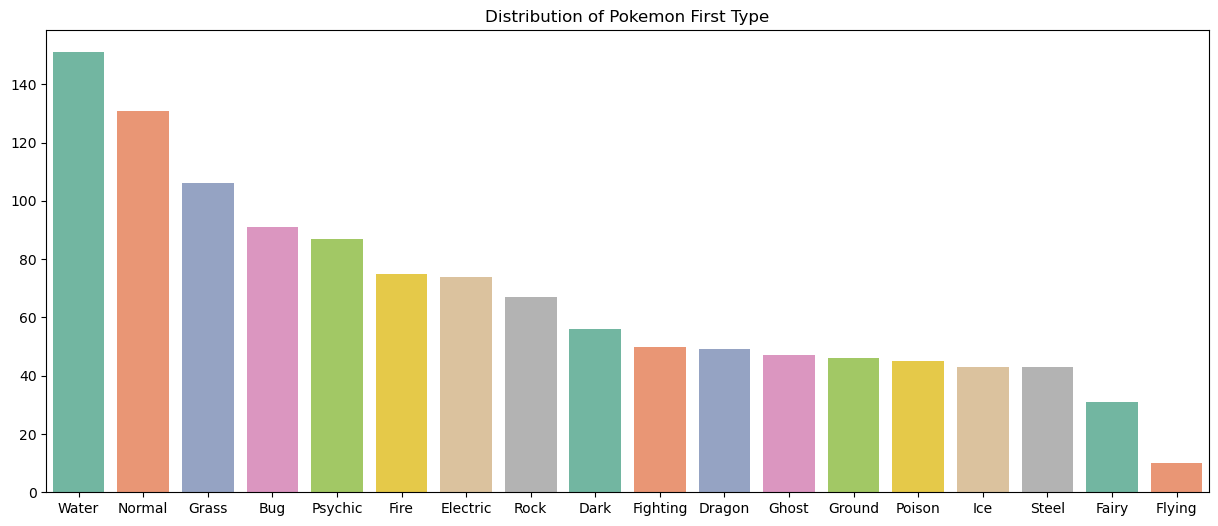

In [89]:
type_counter_type1 = pokedex_IX['Type1'].value_counts()
type_counter_type2 = pokedex_IX['Type2'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(x = type_counter_type1.index, y=type_counter_type1.values, palette='Set2')
plt.title('Distribution of Pokemon First Type')
plt.show()


In [85]:
type_counter_type2_without_no_type = type_counter_type2.reset_index()
type_counter_type2_without_no_type = type_counter_type2_without_no_type.drop([0,0])
type_counter_type2_without_no_type.columns = ['Type', 'Count']

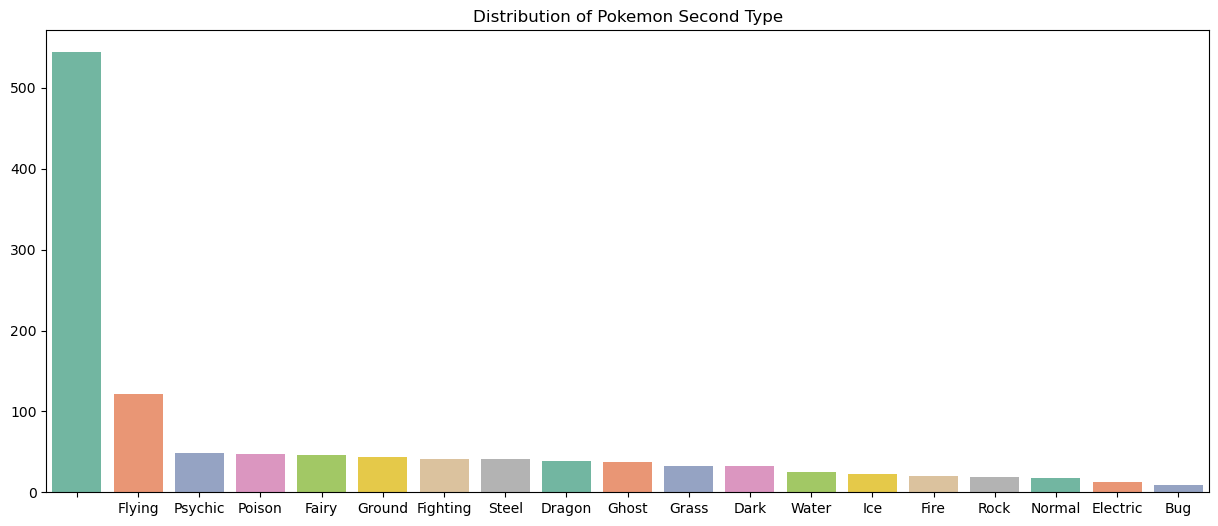

In [82]:
plt.figure(figsize=(15,6))
sns.barplot(x = type_counter_type2.index, y=type_counter_type2.values, palette='Set2')
plt.title('Distribution of Pokemon Second Type')
plt.show()

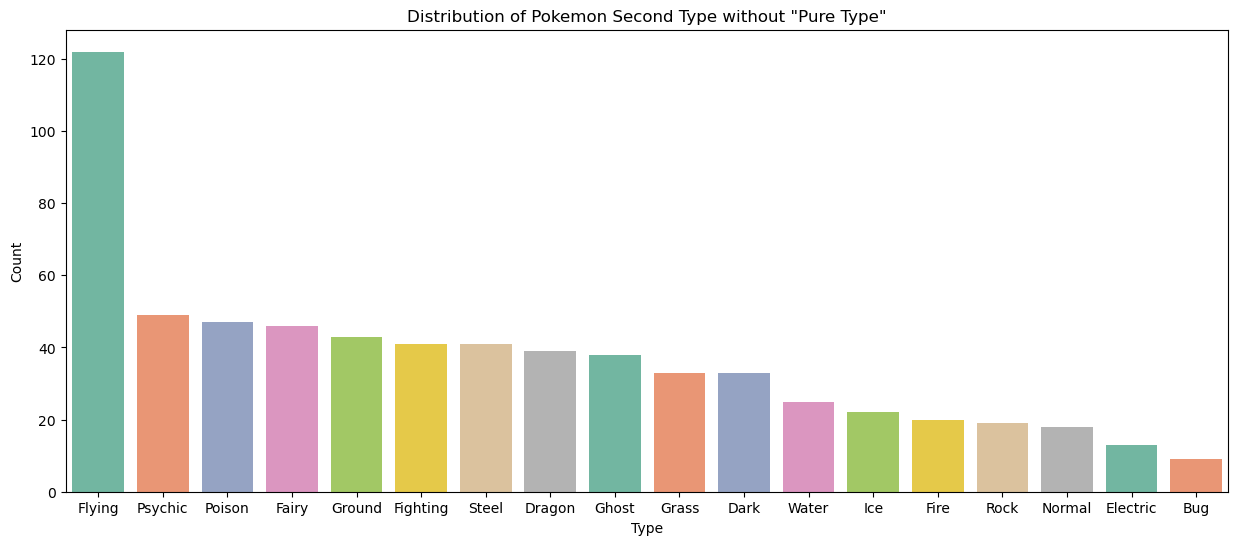

In [84]:
plt.figure(figsize=(15,6))
sns.barplot(data=type_counter_type2_without_no_type, x = 'Type', y='Count', palette='Set2')
plt.title('Distribution of Pokemon Second Type without "Pure Type"')
plt.show()

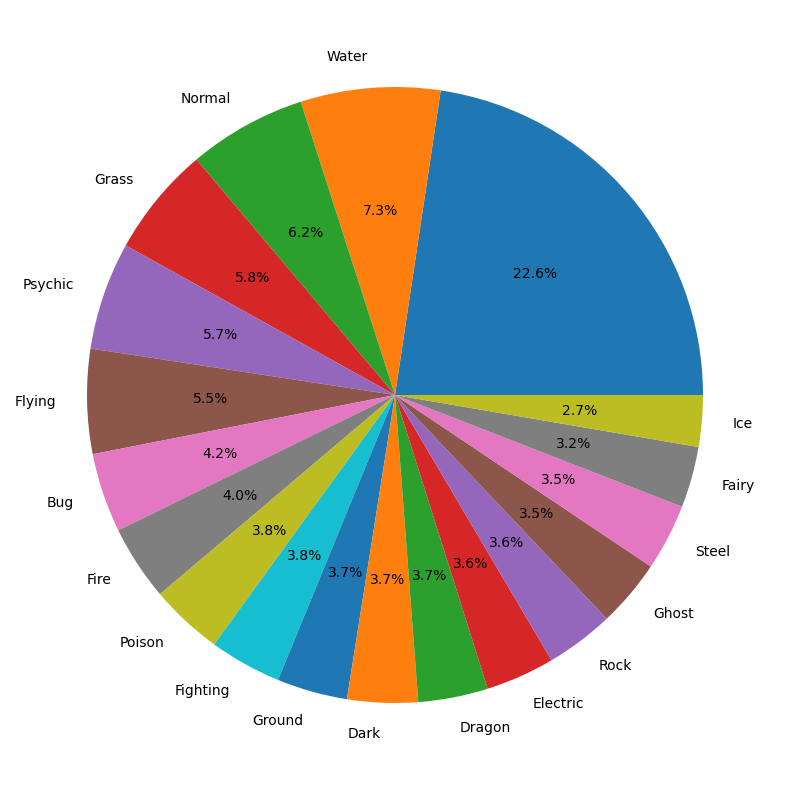

In [35]:
plt.figure(figsize=(10,10))
plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%')
plt.show()

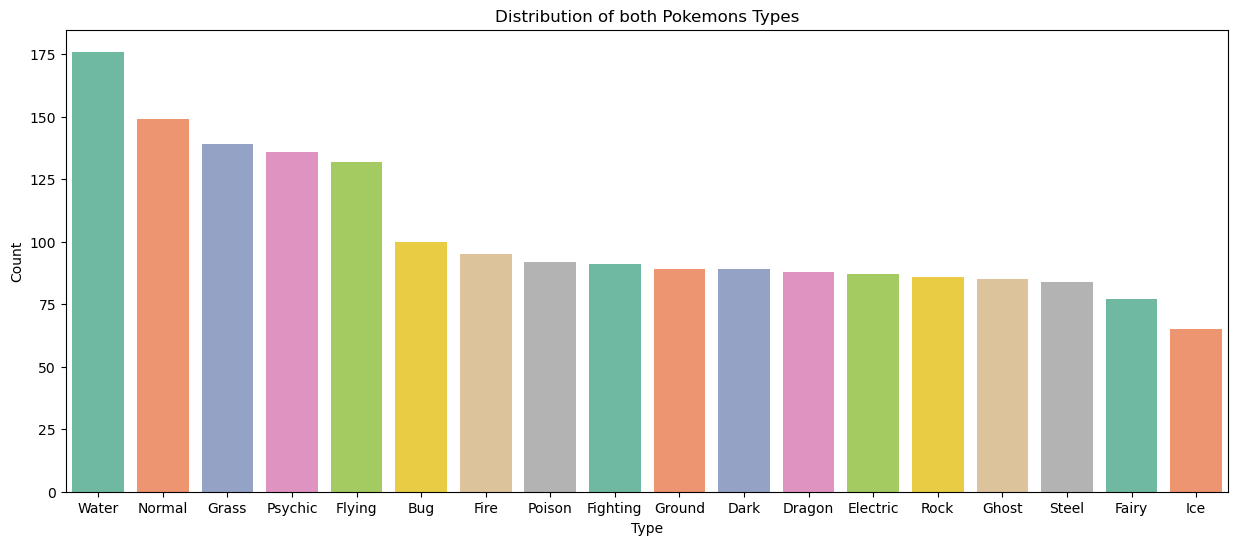

In [36]:
plt.figure(figsize=(15,6))
sns.barplot(data=type_combines, x = 'Type', y='Count', palette='Set2', saturation=0.8)
plt.title('Distribution of both Pokemons Types')
plt.show()


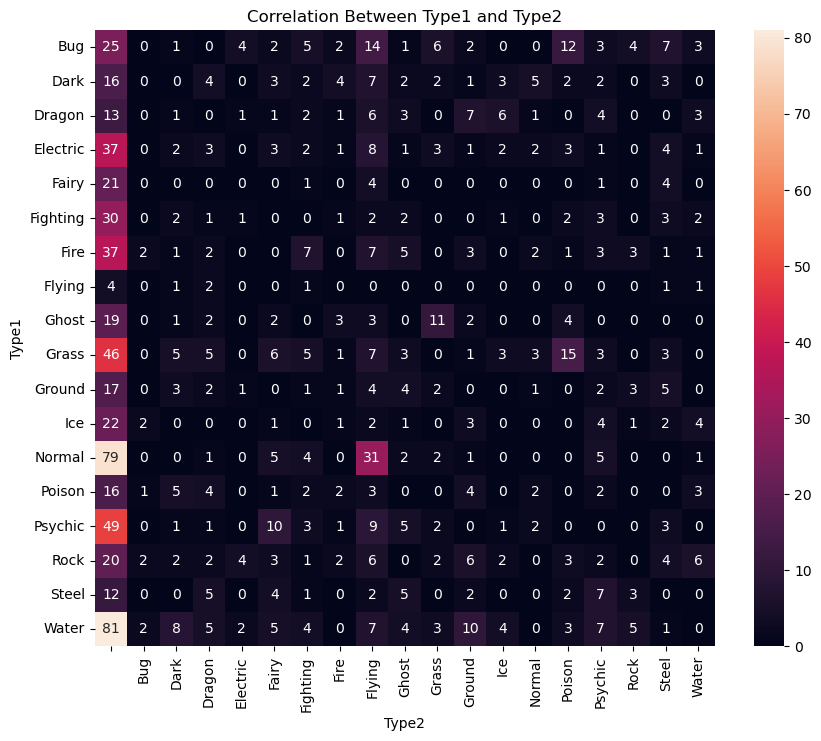

In [38]:
type_correlation = pd.crosstab(pokedex_IX['Type1'], pokedex_IX['Type2'])
plt.figure(figsize=(10,8))
sns.heatmap(type_correlation, annot=True)
plt.title('Correlation Between Type1 and Type2')
plt.xlabel('Type2')
plt.ylabel('Type1')
plt.show()

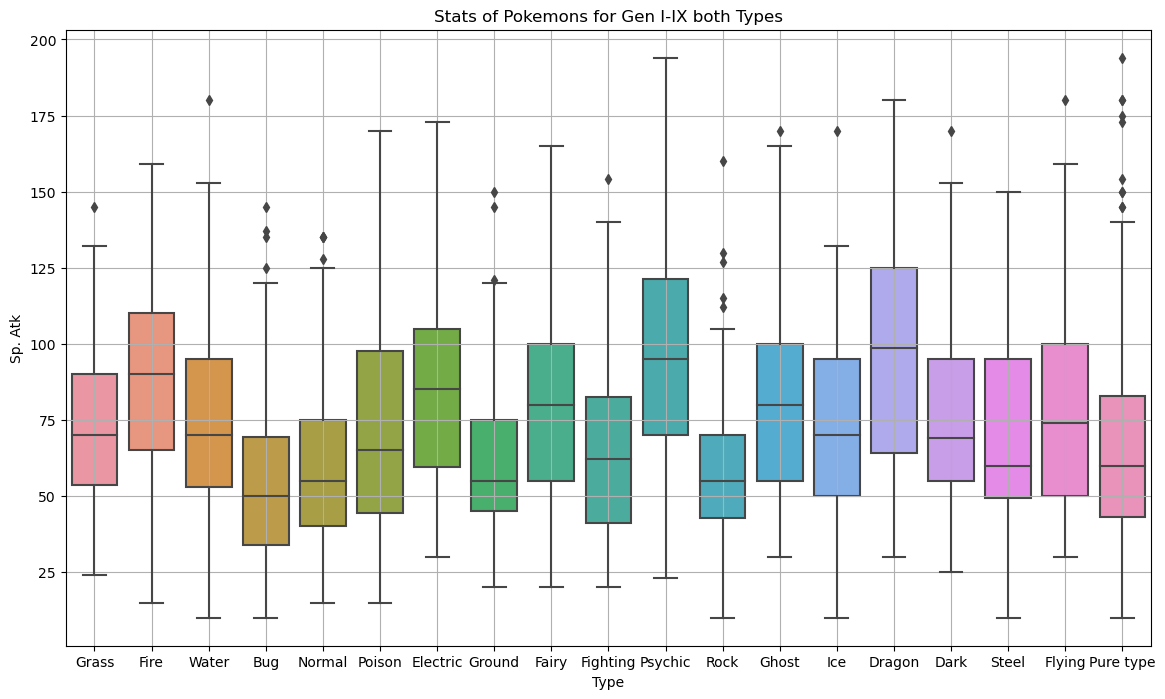

In [80]:
def chart_for_selected_stat_all_types(pokedex_IX, stat):
    combined_types = pd.concat([pokedex_IX[['Type1', stat]].rename(columns={'Type1': 'Type'}),
                            pokedex_IX[['Type2', stat]].rename(columns={'Type2': 'Type'})],
                            ignore_index=True).dropna()
    combined_types['Type'] = combined_types['Type'].apply(lambda x: 'Pure type' if x == ' ' else x)
    plt.figure(figsize=([14,8]))
    sns.boxplot(data=combined_types, x='Type', y=stat)
    plt.title("Stats of Pokemons for Gen I-IX both Types")
    plt.grid()
    plt.show()
chart_for_selected_stat_all_types(pokedex_IX, 'Sp. Atk')

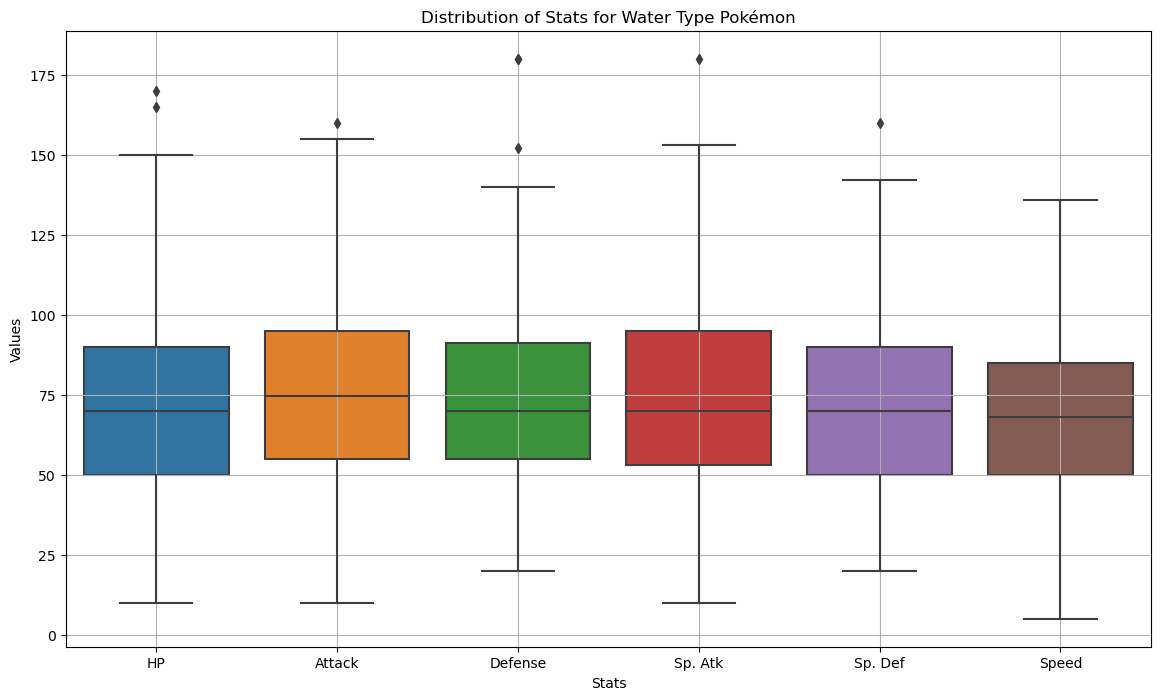

In [78]:
def chart_for_selected_type_all_stats(pokedex_IX, type):
    stats_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
    types = pd.concat([pokedex_IX[['Type1'] + stats_columns].rename(columns={'Type1': 'Type'}),
                    pokedex_IX[['Type2'] + stats_columns].rename(columns={'Type2': 'Type'})],
                    ignore_index=True).dropna()
    types['Type'] = types['Type'].apply(lambda x: 'Pure type' if x == ' ' else x)
    filtered_types = types[types['Type'] == type]
    filtered_types_long = filtered_types.melt(id_vars='Type', value_vars=stats_columns, var_name='Stats', value_name='Values')
    plt.figure(figsize=([14,8]))
    sns.boxplot(data=filtered_types_long, x='Stats', y='Values')
    plt.title(f'Distribution of Stats for {type} Type Pokémon')
    plt.grid()
    plt.show()
chart_for_selected_type_all_stats(pokedex_IX, 'Water')

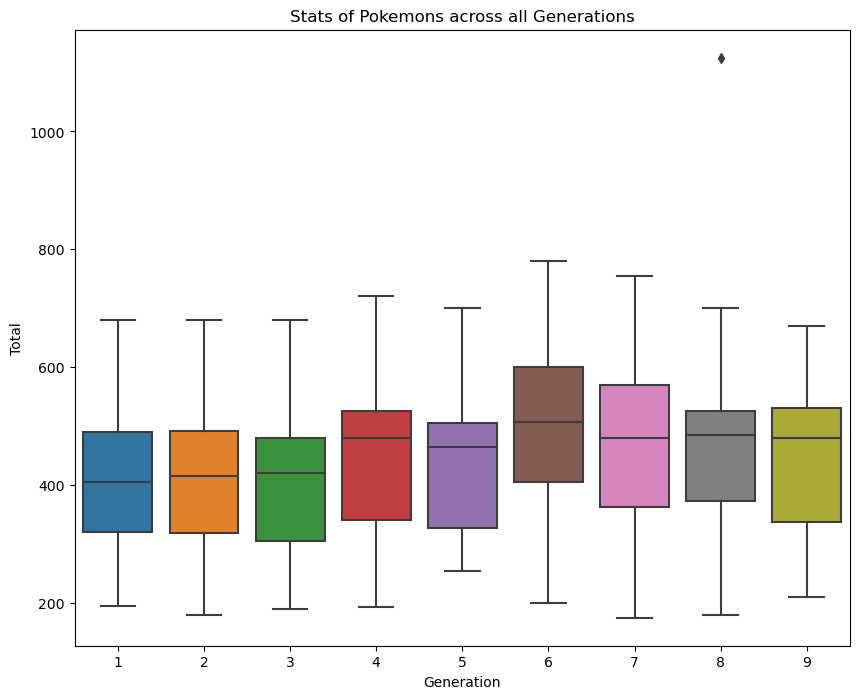

In [79]:
plt.figure(figsize=([10,8]))
sns.boxplot(data=pokedex_IX, x='Generation', y = 'Total')
plt.title("Stats of Pokemons across all Generations")
plt.show()

In [76]:
def chart_both_types_total_stats(pokedex_IX, checking, chart_type):
    stats_columns = ['Total', 'Legendary', 'Mega']
    types = pd.concat([pokedex_IX[['Type1'] + stats_columns].rename(columns={'Type1': 'Type'}),
                       pokedex_IX[['Type2'] + stats_columns].rename(columns={'Type2': 'Type'})],
                       ignore_index=True).dropna()
    types['Type'] = types['Type'].apply(lambda x: 'Pure type' if x == ' ' else x)
    plt.figure(figsize=([23,8]))
    if chart_type == 'swarmplot':
        sns.swarmplot(data=types, x = 'Type', y = 'Total', hue=checking, size=2.5)
        plt.title(f'Distribution of Pokemon Total stats for Gen I-IX by both Types including {checking}')
        plt.show()
    elif chart_type == 'lineplot':
        sns.lineplot(data=types, x = 'Type', y = 'Total', hue=checking)
        plt.title(f'Distribution of Pokemon Total stats for Gen I-IX by both Types including {checking}')
        plt.show()
    elif chart_type == 'violinplot':
        sns.violinplot(data=types, x = 'Type', y = 'Total', hue='Legendary')
        plt.title(f'Distribution of Pokemon Total stats for Gen I-IX by both Types including {checking}')
        plt.show()
    elif chart_type == 'boxplot':
        sns.boxplot(data=types, x = 'Type', y = 'Total', hue=checking)
        plt.title(f'Distribution of Pokemon Total stats for Gen I-IX by both Types including {checking}')
        plt.show()

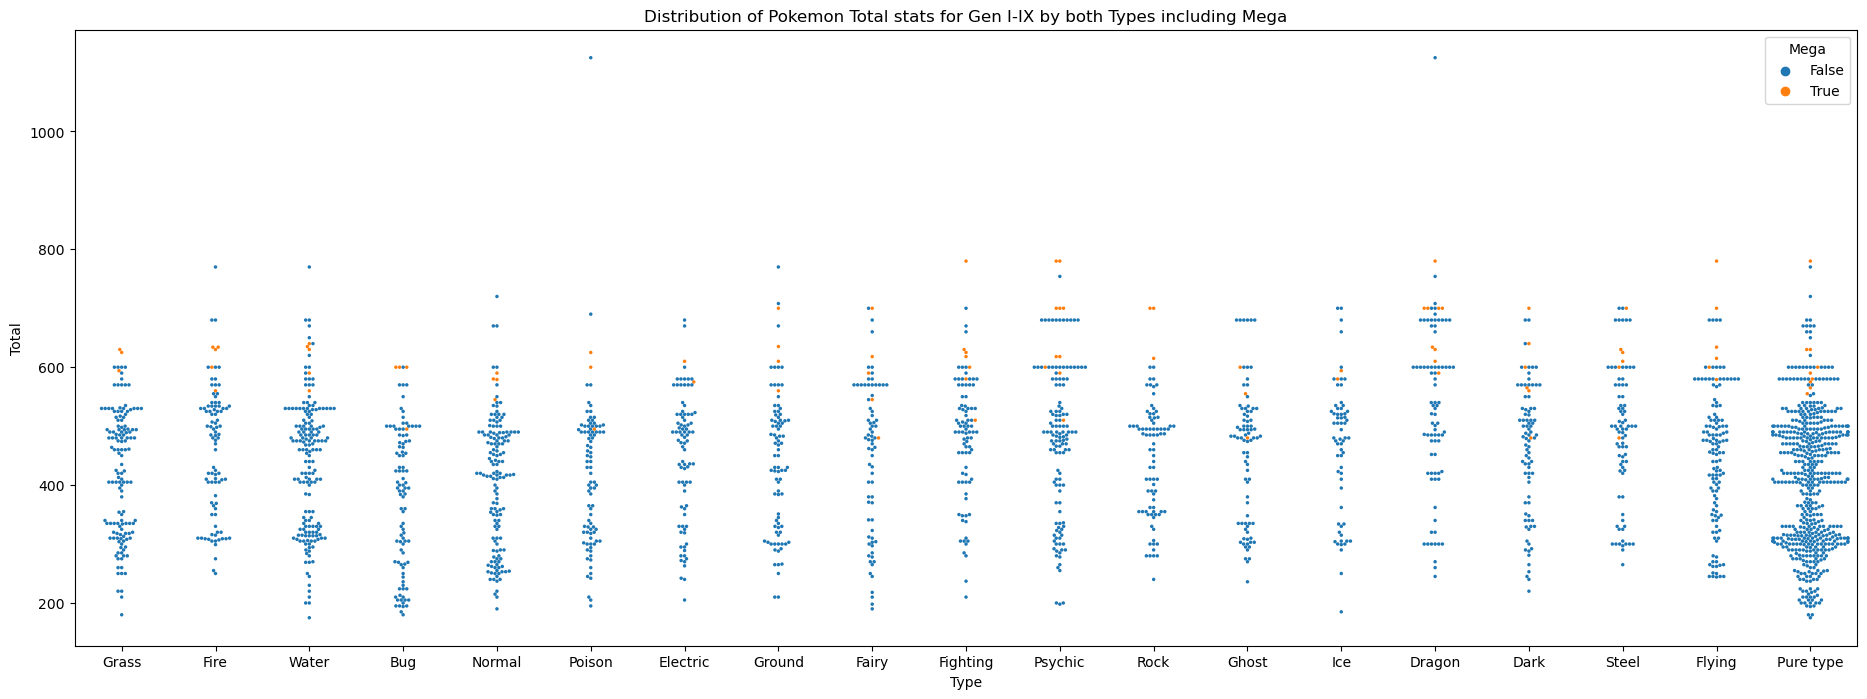

In [77]:
chart_both_types_total_stats(pokedex_IX, 'Mega', 'swarmplot')

In [90]:

stats_columns = ['Total', 'Legendary', 'Mega', 'Generation']
types_per_generatrions = pd.concat([pokedex_IX[['Type1'] + stats_columns].rename(columns={'Type1': 'Type'}),
                    pokedex_IX[['Type2'] + stats_columns].rename(columns={'Type2': 'Type'})],
                    ignore_index=True).dropna()
types_per_generatrions = types_per_generatrions.groupby(['Generation', 'Type']).count().reset_index()
types_per_generatrions['Type'] = types_per_generatrions['Type'].apply(lambda x: 'Pure type' if x == ' ' else x)

Text(0.5, 1.0, 'Scalability of both Pokemons Types through generations')

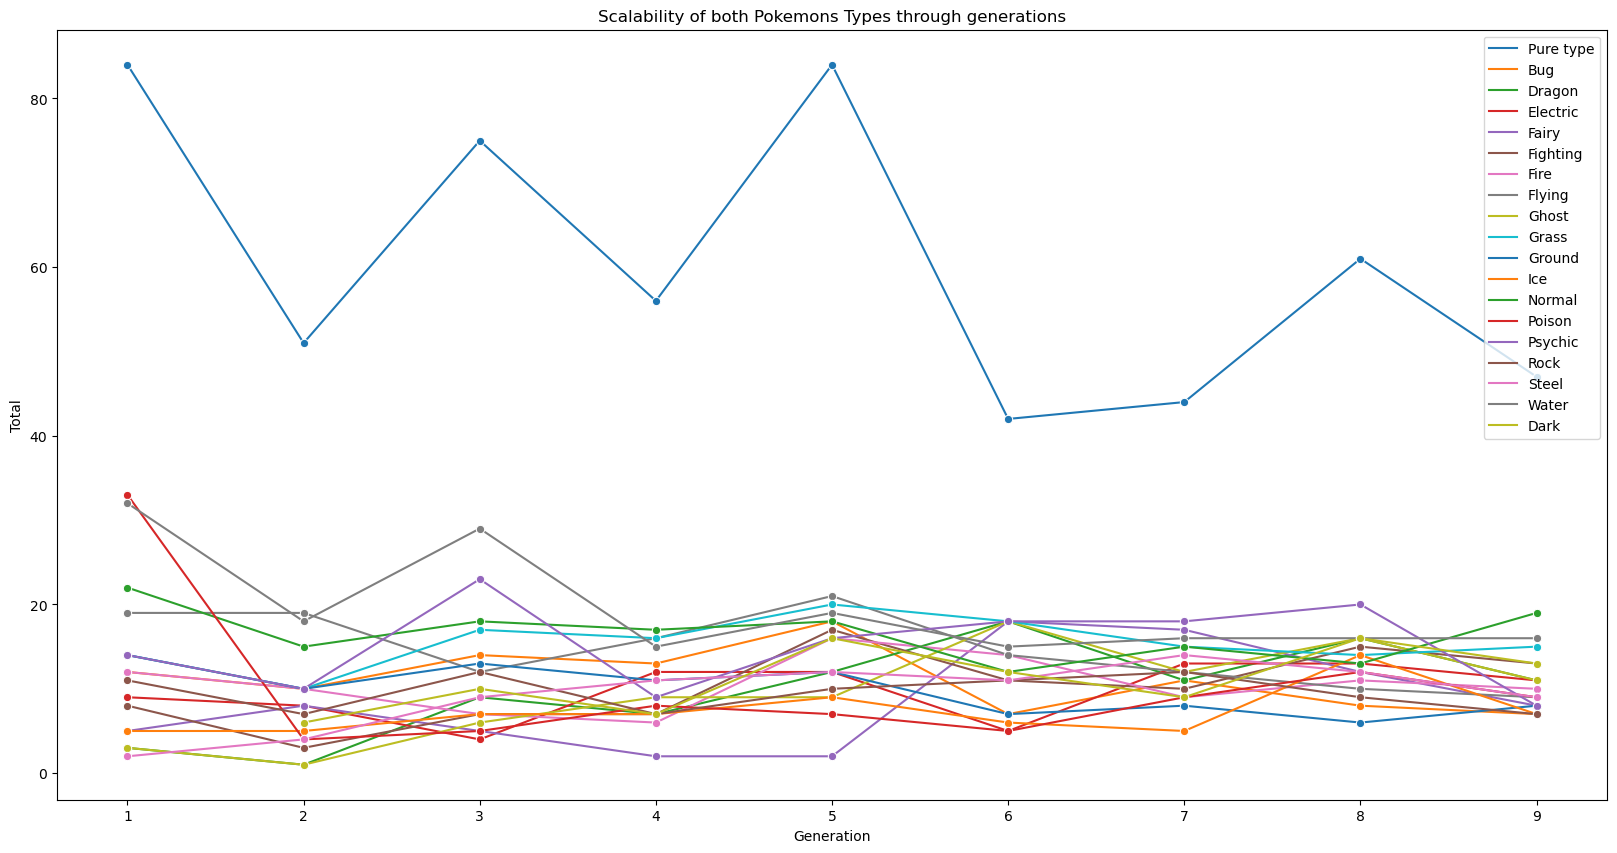

In [106]:
plt.figure(figsize=([20,10]))
sns.lineplot(data=types_per_generatrions, x='Generation', y='Total', hue='Type', palette='tab10', marker='o')
plt.legend(loc = 1)
plt.title('Scalability of both Pokemons Types through generations')
plt.show()

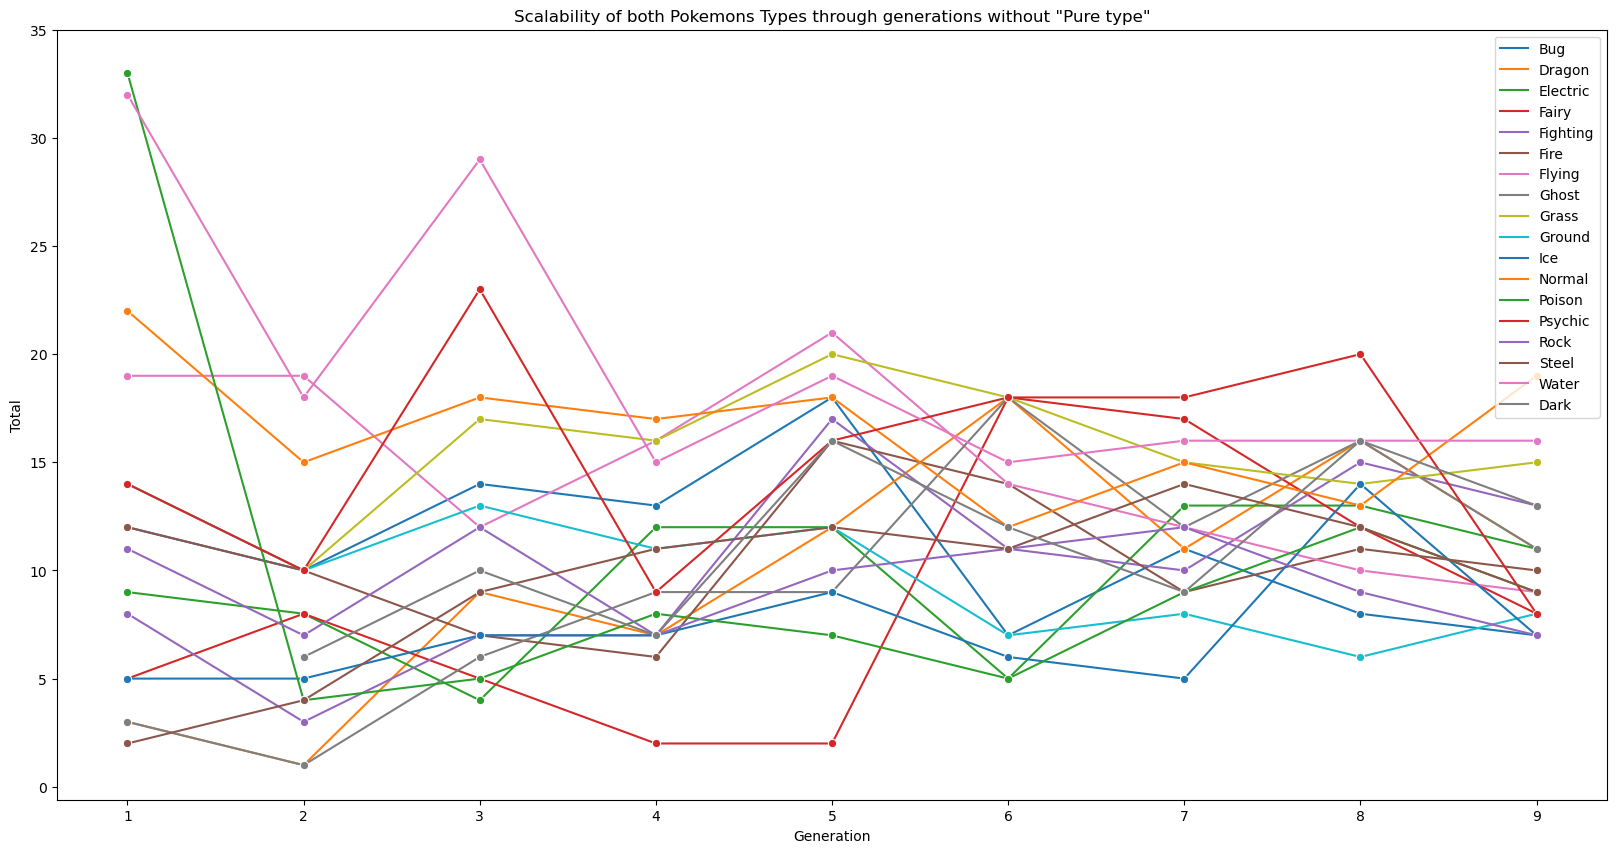

In [105]:
types_per_generatrions_without_pure_tye = types_per_generatrions.copy()
types_per_generatrions_without_pure_tye = types_per_generatrions_without_pure_tye[types_per_generatrions_without_pure_tye['Type'] != 'Pure type']
plt.figure(figsize=([20,10]))
sns.lineplot(data=types_per_generatrions_without_pure_tye, x='Generation', y='Total', hue='Type', palette='tab10', marker='o')
plt.legend(loc = 1)
plt.ylim(top=35)
plt.title('Scalability of both Pokemons Types through generations without "Pure type"')
plt.show()